Images loaded
STyle Transfer complete


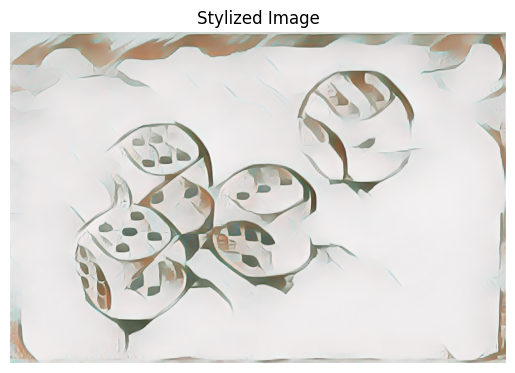

In [6]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the pre-trained model from TF Hub
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

def load_img(path_to_img):
    max_dim = 1024 # Increased resolution for better detail
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape) # Maintains aspect ratio
    img = img[tf.newaxis, :]
    return img

# 2. Automated Image Loading (Bypasses the "File Not Found" error)
# I've replaced these with reliable public links for your testing
print("Downloading images...")
content_path = tf.keras.utils.get_file(
    'dice.png', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJcb_5OH1mWWtvcvDhymf5vM-6kAU3aC_Weg&s'
)
style_path = tf.keras.utils.get_file(
    'potato.png', 'https://www.shutterstock.com/shutterstock/photos/2286554497/display_1500/stock-photo-random-pictures-cute-and-funny-2286554497.jpg'
)
content_image = load_img(content_path)
style_image = load_img(style_path)
print("Images loaded")


# 3. Apply Style Transfer
outputs = model(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]
print("STyle Transfer complete")

# 4. Visualize and Save
plt.imshow(np.squeeze(stylized_image))
plt.title('Stylized Image')
plt.axis('off')
plt.show()

# To save:
tf.keras.preprocessing.image.save_img('styled_output.jpg', np.squeeze(stylized_image))